<a href="https://colab.research.google.com/github/HeHeHuang/BigData/blob/main/1_CV_NN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7)

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation, BatchNormalization 
from tensorflow.keras import utils,regularizers

## 1. DATA IMPORT

In [ ]:
nb_classes = 10
(X_train, y_train),(X_test,y_test) = mnist.load_data()


In [ ]:
print("Shape of features Training set",X_train.shape)
print("Shape of label Training set",y_train.shape)

Shape of features Training set (60000, 28, 28)
Shape of label Training set (60000,)


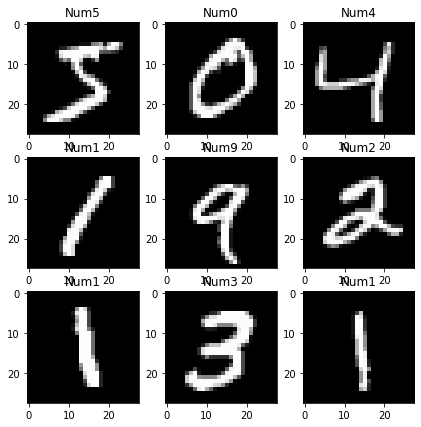

In [ ]:
# visualization for the first image
for i in range(9):
  plt.subplot(3,3,i+1) # 
  plt.imshow(X_train[i],cmap = 'gray',interpolation= 'none')
  plt.title("Num{}".format(y_train[i]))

## 2.Data Preparation
* convert 28 X 28 Pixel to 784 vector
* convert 0-255 to 0-1 (Normlization)


### Prepare X features 

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

#type convert
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

#nomorlization 
X_train /=255
y_train /= 255

In [ ]:
#reshape 2d array to 1d array: vector
X_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
x=[[2,2],
   [2,3]]
print(np.array(x))
print(np.array(x).reshape(4))
print(np.array(x).shape)
print(np.array(x).reshape(4).shape)

[[2 2]
 [2 3]]
[2 2 2 3]
(2, 2)
(4,)


### Prepare y label: one hot encoding

In [ ]:
y_train = utils.to_categorical(y_train,nb_classes)
y_train
y_test = utils.to_categorical(y_test,nb_classes)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 3. Modelling

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512,kernel_regularizer = regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 activation_3 (Activation)   (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                      

In [ ]:
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

## 4. Training Model

In [ ]:
history = model.fit(X_train,y_train,
          batch_size=128, epochs=100,
          verbose=1, 
          validation_data= (X_test,y_test))

Epoch 1/100
469/469 [==============================] - 9s 19ms/step - loss: 4.3031e-16 - accuracy: 1.0000 - val_loss: 27.1547 - val_accuracy: 0.0980
Epoch 2/100
469/469 [==============================] - 9s 19ms/step - loss: 4.1095e-16 - accuracy: 1.0000 - val_loss: 27.1919 - val_accuracy: 0.0980
Epoch 3/100
469/469 [==============================] - 9s 20ms/step - loss: 4.6231e-16 - accuracy: 1.0000 - val_loss: 27.2239 - val_accuracy: 0.0980
Epoch 4/100
469/469 [==============================] - 9s 19ms/step - loss: 4.2275e-16 - accuracy: 1.0000 - val_loss: 27.1102 - val_accuracy: 0.0980
Epoch 5/100
469/469 [==============================] - 9s 20ms/step - loss: 4.5470e-16 - accuracy: 1.0000 - val_loss: 27.1253 - val_accuracy: 0.0980
Epoch 6/100
469/469 [==============================] - 9s 19ms/step - loss: 4.6392e-16 - accuracy: 1.0000 - val_loss: 27.2327 - val_accuracy: 0.0980
Epoch 7/100
469/469 [==============================] - 9s 18ms/step - loss: 4.1481e-16 - accuracy: 1.0000 

In [ ]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 469}

In [ ]:
history.history

{'loss': [4.3031412478710274e-16,
  4.1095238098096793e-16,
  4.623077238752001e-16,
  4.2275178816423675e-16,
  4.5470332677254705e-16,
  4.639189393595554e-16,
  4.148098219623232e-16,
  4.129142681054865e-16,
  4.1902365205623575e-16,
  4.0858839143452e-16,
  4.3172874921835623e-16,
  5.423425435722789e-16,
  5.636340401904958e-16,
  5.174318869286812e-16,
  4.3857518418211473e-16,
  5.870068555787942e-16,
  5.297204821087689e-16,
  5.49663502274957e-16,
  5.131855519454177e-16,
  5.851944168299068e-16,
  4.915897587408997e-16,
  5.714037675365411e-16,
  5.093910031603961e-16,
  4.980905777923989e-16,
  4.405061016644993e-16,
  5.254484184997327e-16,
  4.798340531637533e-16,
  4.72800132751076e-16,
  5.228090638360883e-16,
  5.011597487372156e-16,
  5.297178351308088e-16,
  6.404829042751551e-16,
  5.341057304953821e-16,
  5.92307428944034e-16,
  5.233623351693229e-16,
  5.633498076971328e-16,
  4.456856551974002e-16,
  5.363882195904364e-16,
  6.034920754960534e-16,
  5.83923073315

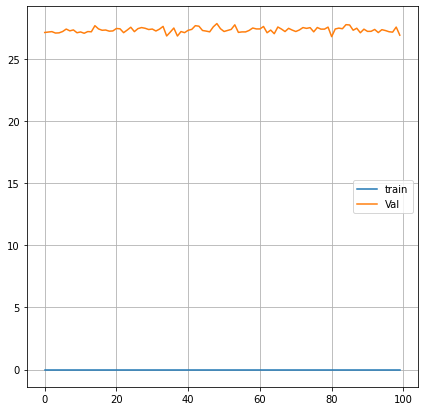

In [ ]:
plt.figure()
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='Val')
plt.legend()
plt.grid()

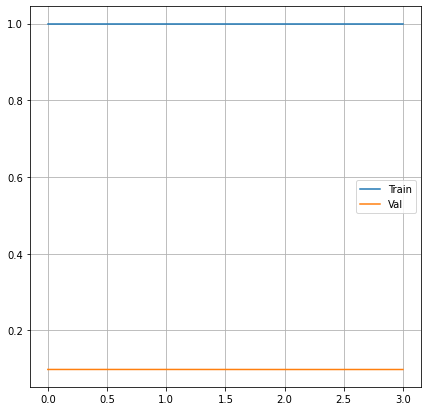

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Val')
plt.legend()
plt.grid()

## 5. Evaluating Model

In [ ]:
score = model.evaluate(X_test,y_test,verbose=1)
print('Test accuracy:',score)

## 6. Model Saving

In [ ]:
model.save('mo_model.h5')
model.tf.keras.models.load_model('my_model.h5')

AttributeError: ignored

###Tensorflowboard